In [113]:
import pandas as pd
import numpy as np
import seaborn as sns

zillow_2016_merged = pd.read_csv('/Users/katherineling/Desktop/Ironhack/zillow_2016_merger.csv') 

zillow_2016_merged.head(100)

,parcelid,logerror,transactiondate,regionidzip,taxdelinquencyflag,airconditioningtypeid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedfinishedsquarefeet,...,regionidcounty,regionidneighborhood,unitcnt,yearbuilt,numberofstories,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount
0,10836049,0.0020,2016-01-08,96415,N,0,1,3,7,1126,...,3101,32368,1,1950,0,22008,61967,2015,39959,933.78
1,10771670,0.0030,2016-01-12,96341,N,0,2,3,7,1216,...,3101,27987,1,1955,0,54031,229427,2015,175396,2838.77
2,10880407,-0.0545,2016-01-05,96450,N,1,1,3,7,984,...,3101,46795,1,1949,0,41803,209018,2015,167215,2655.27
3,10984360,0.0411,2016-01-03,96361,N,0,2,4,7,1150,...,3101,40215,1,1956,0,101800,330000,2015,228200,4205.43
4,12462074,0.0100,2016-01-04,96241,N,0,2,2,7,1648,...,3101,272968,1,1941,0,29551,60330,2015,30779,6542.57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,11655826,-0.2421,2016-01-06,96086,N,1,7,7,10,8520,...,3101,113749,1,1966,0,4969342,7797746,2015,2828404,94997.03
96,12651416,0.0325,2016-01-08,96221,N,0,2,2,4,1876,...,3101,54300,1,1980,0,99970,499867,2015,399897,6106.45
97,10834436,-0.0040,2016-01-08,96415,N,0,1,3,7,1080,...,3101,32368,1,1949,0,19762,61759,2015,41997,801.58
98,10862983,0.0354,2016-01-07,96412,N,1,2,2,4,1261,...,3101,27080,1,1965,0,96788,228845,2015,132057,2867.68


In [114]:
zillow_2016_merged = zillow_2016_merged.drop(columns=['pooltypeid10', 'pooltypeid7', 'bathroomcnt', 'censustractandblock', 'pooltypeid7', 'taxvaluedollarcnt', 'taxamount', 'parcelid'])

In [115]:
indexNames = zillow_2016_merged[ zillow_2016_merged['bedroomcnt'] > 6 ].index

zillow_2016_merged.drop(indexNames, inplace=True)

In [116]:
indexNames = zillow_2016_merged[ zillow_2016_merged['calculatedfinishedsquarefeet'] > 4410 ].index

zillow_2016_merged.drop(indexNames, inplace=True)

In [117]:
indexNames = zillow_2016_merged[ zillow_2016_merged['lotsizesquarefeet'] > 62961 ].index

zillow_2016_merged.drop(indexNames, inplace=True)

In [118]:
zillow_2016_merged = zillow_2016_merged.drop(columns=['numberofstories', 'unitcnt', 'assessmentyear'])

In [119]:
zillow_2016_merged['taxdelinquencyflag'] = zillow_2016_merged['taxdelinquencyflag'].replace('Y', 1)
zillow_2016_merged['taxdelinquencyflag'] = zillow_2016_merged['taxdelinquencyflag'].replace('N', 0)

In [120]:
zillow_2016_merged = pd.get_dummies(zillow_2016_merged, columns=["heatingorsystemtypeid"])

In [121]:
indexNames8 = zillow_2016_merged[ zillow_2016_merged['buildingqualitytypeid'] == 8].index

indexNames8

zillow_2016_merged.drop(indexNames8, inplace=True)

In [122]:
vc = zillow_2016_merged['propertycountylandusecode'].value_counts()
u  = [i not in set(vc[vc<51].index) for i in zillow_2016_merged['propertycountylandusecode']]
zillow_2016_merged = zillow_2016_merged[u]

In [123]:
zillow_2016_merged['propertycountylandusecode'].value_counts()

0100    13664
0101     3642
010C     2972
010E      967
010D      624
0104      157
012C       99
Name: propertycountylandusecode, dtype: int64

In [124]:
zillow_2016_merged.shape

(22125, 27)

In [125]:
zillow_2016_merged = pd.get_dummies(zillow_2016_merged, columns=["propertycountylandusecode"])

In [126]:
zillow_2016_merged = pd.get_dummies(zillow_2016_merged, columns=["propertylandusetypeid"])

In [127]:

indexNames = zillow_2016_merged[ zillow_2016_merged['yearbuilt'] <1935].index
 
zillow_2016_merged.drop(indexNames , inplace=True)

zillow_2016_merged['yearbuilt'].value_counts()

1950    762
1953    687
1954    635
1951    579
1955    561
       ... 
2010     10
2013     10
2011      8
2012      8
2014      6
Name: yearbuilt, Length: 80, dtype: int64

In [128]:
zillow_2016_new = zillow_2016_merged.drop(columns=['transactiondate', 'regionidzip', 'propertyzoningdesc', 'rawcensustractandblock', 'latitude', 'longitude', 'regionidcounty', 'regionidneighborhood'])


In [129]:
zillow_2016_new.shape

(18085, 27)

# Normalizing Data

In [63]:
from sklearn.preprocessing import MinMaxScaler

import pandas as pd
from sklearn import preprocessing


column_names_to_normalize = ['bedroomcnt', 'buildingqualitytypeid', 'calculatedfinishedsquarefeet', 'lotsizesquarefeet', 'poolcnt', 'structuretaxvaluedollarcnt', 'landtaxvaluedollarcnt']

column_names_to_normalize


x = zillow_2016_new[column_names_to_normalize].values

x

min_max_scaler = preprocessing.MinMaxScaler()

x_scaled = min_max_scaler.fit_transform(x)

x_scaled



a = pd.DataFrame(x_scaled)

a.values

zillow_2016_new[['bedroomcnt', 'buildingqualitytypeid', 'calculatedfinishedsquarefeet', 'lotsizesquarefeet', 'poolcnt', 'structuretaxvaluedollarcnt', 'landtaxvaluedollarcnt']] = a.values


a.shape


(18085, 7)

In [130]:
zillow_2016_new.shape

(18085, 27)

# Years to Decades

In [131]:
zillow_2016_new['yearbuilt'] = zillow_2016_new['yearbuilt'].astype('category')

In [132]:
zillow_2016_new['yearbuilt'] = zillow_2016_new['yearbuilt'].astype('str')

In [133]:
zillow_2016_new['yearbuilt'] = zillow_2016_new['yearbuilt'].astype('int')

In [134]:
indexNames = zillow_2016_new[ zillow_2016_new['yearbuilt'] <1935].index
 
zillow_2016_new.drop(indexNames , inplace=True)

zillow_2016_new['yearbuilt'].value_counts()


1950    762
1953    687
1954    635
1951    579
1955    561
       ... 
2010     10
2013     10
2011      8
2012      8
2014      6
Name: yearbuilt, Length: 80, dtype: int64

In [135]:
zillow_2016_new['yearbuilt'] = zillow_2016_new['yearbuilt'].astype('str')

In [136]:
zillow_2016_new['yearbuilt'] = (zillow_2016_new.yearbuilt.replace({'195':'1950'}, regex=True))

In [137]:
zillow_2016_new['yearbuilt'] = (zillow_2016_new.yearbuilt.replace({'193':'1930'}, regex=True))

In [138]:
zillow_2016_new['yearbuilt'] = (zillow_2016_new.yearbuilt.replace({'194':'1940'}, regex=True))

In [139]:
zillow_2016_new['yearbuilt'] = (zillow_2016_new.yearbuilt.replace({'196':'1960'}, regex=True))

In [140]:
zillow_2016_new['yearbuilt'] = (zillow_2016_new.yearbuilt.replace({'197':'1970'}, regex=True))

In [141]:
zillow_2016_new['yearbuilt'] = (zillow_2016_new.yearbuilt.replace({'198':'1980'}, regex=True))

In [142]:
zillow_2016_new['yearbuilt'] = (zillow_2016_new.yearbuilt.replace({'199':'1990'}, regex=True))

In [143]:
zillow_2016_new['yearbuilt'] = (zillow_2016_new.yearbuilt.replace({'20':'2000'}, regex=True))

In [144]:
zillow_2016_new['yearbuilt'] = (zillow_2016_new.yearbuilt.replace({'201':'2010'}, regex=True))

In [145]:
zillow_2016_new['yearbuilt'] = zillow_2016_new['yearbuilt'].astype(str).str[:-1]

In [146]:
zillow_2016_new['yearbuilt'] = (zillow_2016_new.yearbuilt.replace({'19500':'1950'}, regex=True))

In [147]:
zillow_2016_new['yearbuilt'].unique()

array(['1950', '1940', '1980', '1930', '1970', '1960', '1990', '20000',
       '20001'], dtype=object)

In [148]:
zillow_2016_new['yearbuilt'] = (zillow_2016_new.yearbuilt.replace({'20000':'2000'}, regex=True))

In [149]:
zillow_2016_new['yearbuilt'] = (zillow_2016_new.yearbuilt.replace({'20001':'2010'}, regex=True))

In [150]:
zillow_2016_new['yearbuilt'].unique()

array(['1950', '1940', '1980', '1930', '1970', '1960', '1990', '2000',
       '2010'], dtype=object)

In [151]:
zillow_2016_new['yearbuilt'] = zillow_2016_new['yearbuilt'].astype('category')

In [152]:
zillow_2016_new = pd.get_dummies(zillow_2016_new, columns=["yearbuilt"])

zillow_2016_new.head(100)

,logerror,taxdelinquencyflag,airconditioningtypeid,bedroomcnt,buildingqualitytypeid,calculatedfinishedsquarefeet,hashottuborspa,lotsizesquarefeet,poolcnt,regionidcity,...,propertylandusetypeid_269,yearbuilt_1930,yearbuilt_1940,yearbuilt_1950,yearbuilt_1960,yearbuilt_1970,yearbuilt_1980,yearbuilt_1990,yearbuilt_2000,yearbuilt_2010
0,0.0020,0,0,3,7,1126,0,6306.0,0,12447,...,0,0,0,1,0,0,0,0,0,0
1,0.0030,0,0,3,7,1216,0,7560.0,0,12447,...,0,0,0,1,0,0,0,0,0,0
2,-0.0545,0,1,3,7,984,0,6448.0,0,12447,...,0,0,1,0,0,0,0,0,0,0
3,0.0411,0,0,4,7,1150,0,7552.0,0,12447,...,0,0,0,1,0,0,0,0,0,0
4,0.0100,0,0,2,7,1648,0,5697.0,0,46298,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,0.0459,0,1,3,4,1627,0,15487.0,0,48424,...,0,0,0,0,0,0,1,0,0,0
144,-0.0171,0,1,2,4,1253,0,12016.0,0,47019,...,0,0,0,0,0,0,1,0,0,0
145,0.1890,0,0,3,7,2242,0,8501.0,0,12447,...,0,0,1,0,0,0,0,0,0,0
146,-0.6368,0,0,2,7,936,0,8369.0,0,12447,...,0,1,0,0,0,0,0,0,0,0


In [153]:
zillow_2016_new.shape

(18085, 35)

# Normalize Data

In [154]:
from sklearn.preprocessing import MinMaxScaler

import pandas as pd
from sklearn import preprocessing


column_names_to_normalize = ['bedroomcnt', 'buildingqualitytypeid', 'calculatedfinishedsquarefeet', 'lotsizesquarefeet', 'poolcnt', 'structuretaxvaluedollarcnt', 'landtaxvaluedollarcnt']

column_names_to_normalize


x = zillow_2016_new[column_names_to_normalize].values

x

min_max_scaler = preprocessing.MinMaxScaler()

x_scaled = min_max_scaler.fit_transform(x)

x_scaled



a = pd.DataFrame(x_scaled)

a.values

zillow_2016_new[['bedroomcnt', 'buildingqualitytypeid', 'calculatedfinishedsquarefeet', 'lotsizesquarefeet', 'poolcnt', 'structuretaxvaluedollarcnt', 'landtaxvaluedollarcnt']] = a.values


a.shape


(18085, 7)

# PCA Analysis

In [155]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


pca_zillow = PCA(n_components=7, random_state = 0)
# principalComponents_zillow = pca_zillow.fit_transform(x_scaled)

principalComponents_zillow = pca_zillow.fit_transform(a)

principalComponents_zillow

array([[-0.29210679,  0.05594724, -0.15913451, ..., -0.06856282,
        -0.01798715, -0.0021261 ],
       [-0.28642709,  0.04864136, -0.14124131, ..., -0.0506748 ,
        -0.00352419, -0.00926292],
       [-0.29519087,  0.0748585 , -0.16281388, ..., -0.08263989,
         0.01119138, -0.00668506],
       ...,
       [-0.15661385,  0.21952755,  0.25434786, ...,  0.1500496 ,
        -0.0471289 , -0.03934337],
       [ 0.76438617, -0.01172073,  0.03497608, ...,  0.03162361,
         0.01140892, -0.05131323],
       [-0.29972057,  0.14895746, -0.13755839, ...,  0.06006688,
        -0.02740356, -0.01215202]])

In [156]:
pca_zillow

PCA(copy=True, iterated_power='auto', n_components=7, random_state=0,
    svd_solver='auto', tol=0.0, whiten=False)

In [157]:
pca = PCA()
pca.fit(a)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [158]:
variations = pca.explained_variance_ratio_*100
variations = np.round(variations, decimals=1)
variations

array([63.2, 15.4, 11.8,  5.9,  2.6,  0.8,  0.3])

In [103]:
plot_labels = ['PC'+str(i) for i in range(1,len(variations)+1)]
?plot_labels

Text(0.5, 1.0, 'PCA Scree Plot')

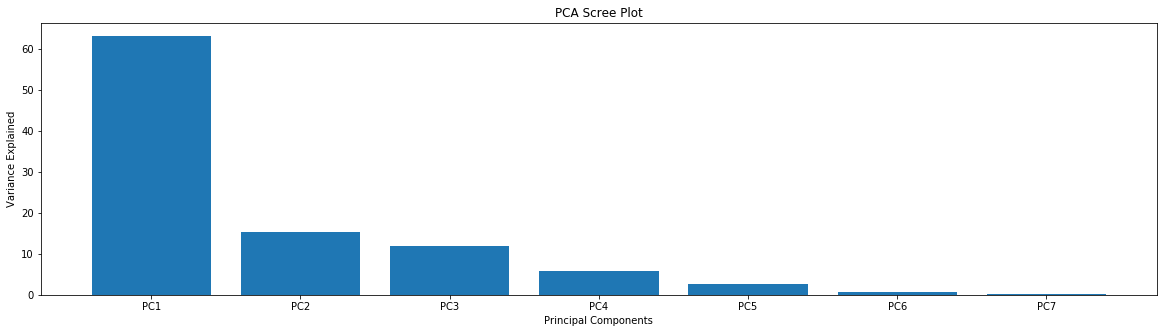

In [159]:
from matplotlib.pyplot import figure
figure(figsize=(20,5))
plt.bar(x = plot_labels, height=variations)
plt.xlabel('Principal Components')
plt.ylabel('Variance Explained')
plt.title('PCA Scree Plot')

In [160]:
principal_zillow_Df = pd.DataFrame(data = principalComponents_zillow, columns = ['PC 1', 'PC 2', 'PC 3', 'PC 4', 'PC 5', 'PC 6', 'PC 7'])

principal_zillow_Df


,PC 1,PC 2,PC 3,PC 4,PC 5,PC 6,PC 7
0,-0.292107,0.055947,-0.159135,0.014340,-0.068563,-0.017987,-0.002126
1,-0.286427,0.048641,-0.141241,0.034411,-0.050675,-0.003524,-0.009263
2,-0.295191,0.074858,-0.162814,0.007627,-0.082640,0.011191,-0.006685
3,-0.277491,-0.047648,-0.158766,0.089209,-0.166919,0.042382,0.000789
4,-0.289360,0.081121,-0.126352,-0.015755,0.119637,-0.082950,-0.010353
...,...,...,...,...,...,...,...
18080,-0.265254,-0.005710,0.065224,-0.188607,0.095297,-0.039425,0.030600
18081,-0.255066,-0.058858,0.067422,-0.115309,-0.062792,-0.035243,0.000064
18082,-0.156614,0.219528,0.254348,0.840577,0.150050,-0.047129,-0.039343
18083,0.764386,-0.011721,0.034976,-0.052743,0.031624,0.011409,-0.051313


In [161]:
print('Explained variation per principal component: {}'.format(pca_zillow.explained_variance_ratio_))

Explained variation per principal component: [0.6316781  0.15405442 0.11837797 0.05929608 0.02602934 0.00778273
 0.00278136]


In [162]:
pca_new = PCA(n_components=4, random_state=0)

pca_new

PCA(copy=True, iterated_power='auto', n_components=4, random_state=0,
    svd_solver='auto', tol=0.0, whiten=False)

In [163]:
top_pca = principal_zillow_Df.iloc[:, : 4]

In [164]:
top_pca

,PC 1,PC 2,PC 3,PC 4
0,-0.292107,0.055947,-0.159135,0.014340
1,-0.286427,0.048641,-0.141241,0.034411
2,-0.295191,0.074858,-0.162814,0.007627
3,-0.277491,-0.047648,-0.158766,0.089209
4,-0.289360,0.081121,-0.126352,-0.015755
...,...,...,...,...
18080,-0.265254,-0.005710,0.065224,-0.188607
18081,-0.255066,-0.058858,0.067422,-0.115309
18082,-0.156614,0.219528,0.254348,0.840577
18083,0.764386,-0.011721,0.034976,-0.052743


In [165]:
#concat with categorical

categorical_columns = ['taxdelinquencyflag', 'airconditioningtypeid', 'hashottuborspa', 'regionidcity_45457',
                      'regionidcity_46298', 'regionidcity_47019', 'regionidcity_48424', 'regionidcity_51617',
                      'regionidcity_51861', 'regionidcity_54299', 'regionidcity_54311', 'regionidcity_54722',
                      'regionidcity_396054', 'yearbuilt_1930', 'yearbuilt_1940', 'yearbuilt_1950', 'yearbuilt_1960',
                      'yearbuilt_1970', 'yearbuilt_1980', 'yearbuilt_1990', 'yearbuilt_2000', 'yearbuilt_2010']

In [167]:
categorical = zillow_2016_new[categorical_columns].values

categorical

KeyError: "['regionidcity_54311', 'regionidcity_47019', 'regionidcity_51861', 'regionidcity_45457', 'regionidcity_46298', 'regionidcity_48424', 'regionidcity_396054', 'regionidcity_51617', 'regionidcity_54722', 'regionidcity_54299'] not in index"